### Machine Learning - Assignment 1 - Group 090

**Question 2 :**

In [1]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1 . Importing the dataset**

In [2]:
#importing the datasets
df = pd.read_csv(r"F:\M.tech\Study Materials\2nd Sem Materials\Machine Learning\Slides\Assignment - 1\Set 3\Q2\car_data.csv")

In [3]:
#viewing the head of the dataframe
df.head()

,Buying,Maintenence,Doors,Persons,Lugloot,Safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
#Viewing the summary of the data
df.describe()

,Buying,Maintenence,Doors,Persons,Lugloot,Safety,Class Values
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,4,4,med,med,unacc
freq,432,432,432,576,576,576,1210


In [5]:
#Checking for any null values
df.isna().sum()

Buying          0
Maintenence     0
Doors           0
Persons         0
Lugloot         0
Safety          0
Class Values    0
dtype: int64

**Feature Enginnering**

In [6]:
#assigning values for text
df["Doors"] = df["Doors"].replace("5more", "5")
df["Persons"] = df["Persons"].replace("more", "5")
df["Buying"] = df["Buying"].replace(('vhigh', 'high', 'med', 'low'),("3", "2", "1", "0"))
df["Maintenence"] = df["Maintenence"].replace(('vhigh', 'high', 'med', 'low'),("3", "2", "1", "0"))
df["Lugloot"] = df["Lugloot"].replace(('small','med','big'),("0","1","2"))
df["Safety"] = df["Safety"].replace(('low','med','high'),("0","1","2"))
df["Class Values"] = df["Class Values"].replace(('unacc', 'acc', 'vgood', 'good'),("0","1","2","3"))

**2. Extract X as all columns except the first column and Y as first column**

In [7]:
#spiltting the dataset into training and testing datasets
from sklearn.model_selection import KFold

# Extracting X as all columns except the first column and Y as first column.
X = df.drop(["Class Values"], axis = 1)
y = df["Class Values"]

**3. Visualise the dataset**

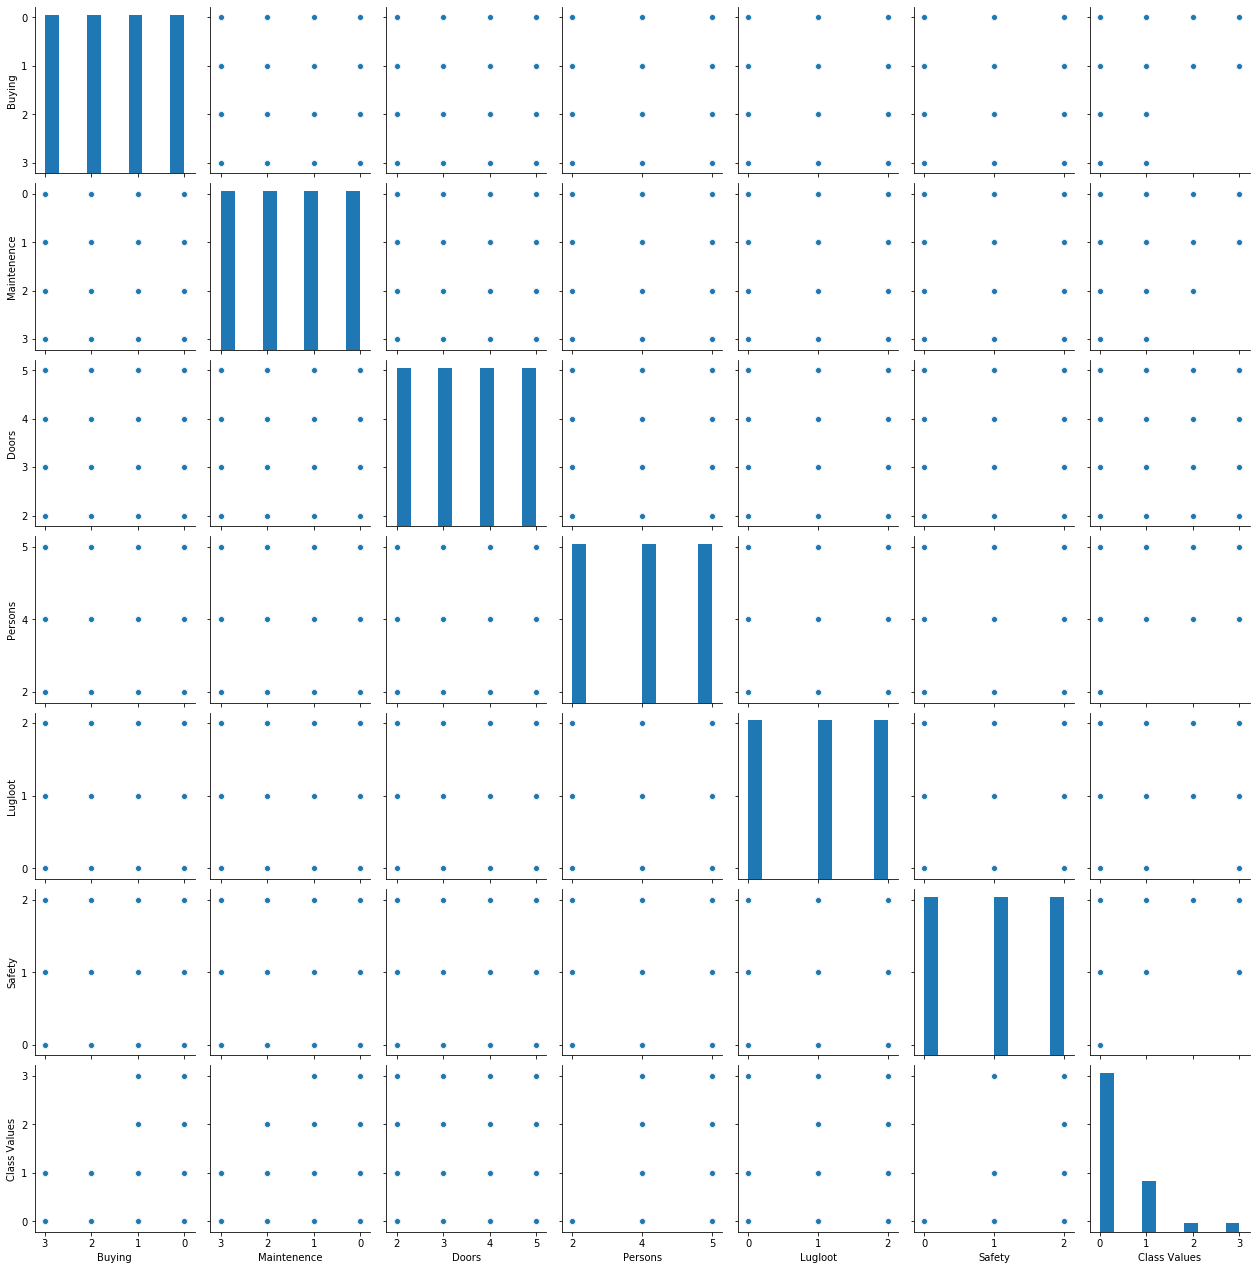

In [8]:
#viweing the relationshp between the variables
sns.pairplot(df,palette='viridis')

In [9]:
#importing the datasets
df1 = pd.read_csv(r"F:\M.tech\Study Materials\2nd Sem Materials\Machine Learning\Slides\Assignment - 1\Set 3\Q2\car_data.csv")

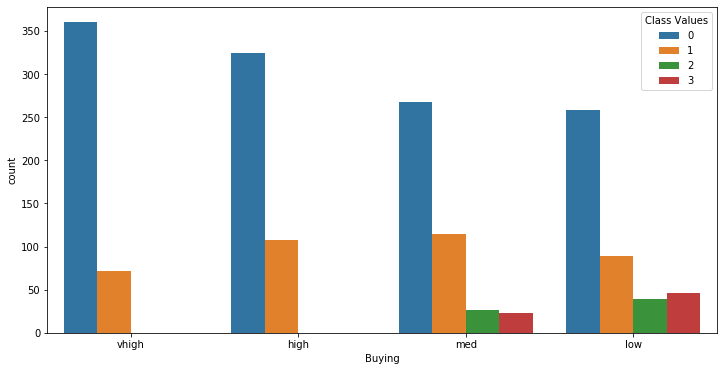

In [10]:
#Visualisation of buying vs class values
X1 = df1["Buying"]
Y1 = df1["Safety"]
hue1 = df["Class Values"]
plt.figure(figsize=(12, 6))
sns.countplot(x=X1, hue=hue1)

**3. Visualize the correlation between all the variables of dataset**

In [11]:
#Performing correlations between the variables
df1["Doors"] = df1["Doors"].replace("5more", 5)
df1["Persons"] = df1["Persons"].replace("more", 5)
df1["Buying"] = df1["Buying"].replace(('vhigh', 'high', 'med', 'low'),(3, 2, 1, 0))
df1["Maintenence"] = df1["Maintenence"].replace(('vhigh', 'high', 'med', 'low'),(3, 2, 1, 0))
df1["Lugloot"] = df1["Lugloot"].replace(('small','med','big'),(0,1,2))
df1["Safety"] = df1["Safety"].replace(('low','med','high'),(0,1,2))
df1["Class Values"] = df1["Class Values"].replace(('unacc', 'acc', 'vgood', 'good'),(0,1,2,3))

In [12]:
df1.corr()

,Buying,Maintenence,Lugloot,Safety,Class Values
Buying,1.000000,0.000000,0.000000,0.000000,-0.286532
Maintenence,0.000000,1.000000,0.000000,0.000000,-0.254656
Lugloot,0.000000,0.000000,1.000000,0.000000,0.121453
Safety,0.000000,0.000000,0.000000,1.000000,0.402313
Class Values,-0.286532,-0.254656,0.121453,0.402313,1.000000


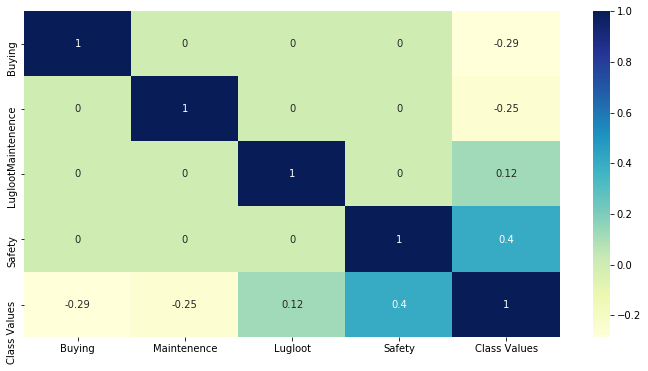

In [13]:
#Visualzing the heatmap for the correlated data
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),annot=True,cmap="YlGnBu")

**3. Split the data into training set and testing set.  Perform 10-fold cross validation.**

In [14]:
#let's view the trained and test data
kf = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X, y=df["Class Values"]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

TRAIN: [ 173  174  175 ... 1725 1726 1727] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172]
TRAIN: [   0    1    2 ... 1725 1726 1727] TEST: [173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 

**4. Train a Logistic regression model for the dataset**

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Sharath Vaidyanath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**5. Compute the accuracy and confusion matrix**

In [16]:
#Let's view the accuracy score 
train_acc = logreg.score(X_train,y_train) * 100
test_acc = logreg.score(X_test,y_test) * 100
print("Training set accuracy score: {:.3f}".format(train_acc))
print("Test set accuracy score: {:.3f}".format(test_acc))

Training set accuracy score: 87.082
Test set accuracy score: 62.209


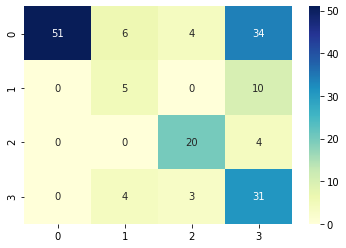

In [17]:
#Let's plot the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,cmap="YlGnBu")

**6. Plot the decision boundary, visualize training and test results**

In [18]:
X1 = df1.drop(["Class Values"], axis = 1)
y1 = df1["Class Values"]

No handles with labels found to put in legend.


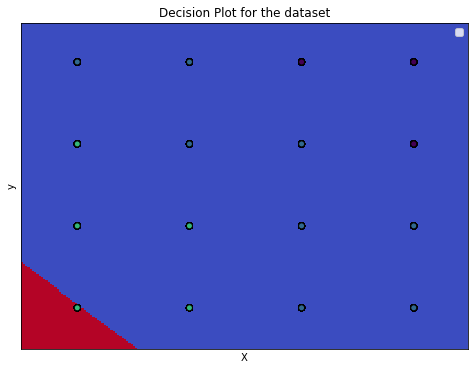

In [19]:
# Plot the decision boundary.
# point in the mesh [x_min, x_max]x[y_min, y_max].
logreg1 = LogisticRegression()
reduced_data = X1.iloc[:, :2].values
logreg1.fit(reduced_data, y1)
x_min, x_max = reduced_data[:, 0].min() - .5, reduced_data[:, 0].max() + .5
y_min, y_max = reduced_data[:, 1].min() - .5, reduced_data[:, 1].max() + .5
h = 0.02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = logreg1.predict(grid)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.coolwarm)
# Plot also the training points
plt.scatter(X1.iloc[:, 0].values, X1.iloc[:, 1].values, c=y1, edgecolors='k', cmap=plt.cm.viridis)

plt.title("Decision Plot for the dataset")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

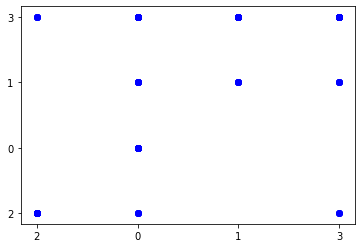

In [20]:
# visualizing training and test results
plt.scatter(y_test,y_pred,c='blue')

**7. Predict and display the class label of a car with all attributes** 

In [21]:
for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (X_test[i], y_pred[i]))

X=['0' '1' '3' '4' '2' '2'], Predicted=2
X=['0' '1' '3' '5' '0' '0'], Predicted=0
X=['0' '1' '3' '5' '0' '1'], Predicted=1
X=['0' '1' '3' '5' '0' '2'], Predicted=3
X=['0' '1' '3' '5' '1' '0'], Predicted=0
X=['0' '1' '3' '5' '1' '1'], Predicted=3
X=['0' '1' '3' '5' '1' '2'], Predicted=2
X=['0' '1' '3' '5' '2' '0'], Predicted=1
X=['0' '1' '3' '5' '2' '1'], Predicted=3
X=['0' '1' '3' '5' '2' '2'], Predicted=2
X=['0' '1' '4' '2' '0' '0'], Predicted=0
X=['0' '1' '4' '2' '0' '1'], Predicted=0
X=['0' '1' '4' '2' '0' '2'], Predicted=0
X=['0' '1' '4' '2' '1' '0'], Predicted=0
X=['0' '1' '4' '2' '1' '1'], Predicted=0
X=['0' '1' '4' '2' '1' '2'], Predicted=0
X=['0' '1' '4' '2' '2' '0'], Predicted=0
X=['0' '1' '4' '2' '2' '1'], Predicted=0
X=['0' '1' '4' '2' '2' '2'], Predicted=2
X=['0' '1' '4' '4' '0' '0'], Predicted=0
X=['0' '1' '4' '4' '0' '1'], Predicted=1
X=['0' '1' '4' '4' '0' '2'], Predicted=3
X=['0' '1' '4' '4' '1' '0'], Predicted=0
X=['0' '1' '4' '4' '1' '1'], Predicted=1
X=['0' '1' '4' '

In [22]:
df2 = pd.concat([df, pd.Series(y_pred)], axis=1)
df2.columns = ['Buying', 'Maintenence', 'Doors', 'Persons', 'Lugloot', 'Safety','Class Values','Prediction']

#Reverting back to text
df2["Doors"] = df2["Doors"].replace("5", "5more")
df2["Persons"] = df2["Persons"].replace("5", "more")
df2["Buying"] = df2["Buying"].replace(("3", "2", "1", "0"),('vhigh', 'high', 'med', 'low'))
df2["Maintenence"] = df2["Maintenence"].replace(("3", "2", "1", "0"),('vhigh', 'high', 'med', 'low'))
df2["Lugloot"] = df2["Lugloot"].replace(("0","1","2"),('small','med','big'))
df2["Safety"] = df2["Safety"].replace(("0","1","2"),('low','med','high'))
df2["Class Values"] = df2["Class Values"].replace(("0","1","2","3"),('unacc', 'acc', 'vgood', 'good'))
df2["Prediction"] = df2["Prediction"].replace(("3", "2", "1", "0"),('vhigh', 'high', 'med', 'low'))

###The final Data :
df2

,Buying,Maintenence,Doors,Persons,Lugloot,Safety,Class Values,Prediction
0,vhigh,vhigh,2,2,small,low,unacc,high
1,vhigh,vhigh,2,2,small,med,unacc,low
2,vhigh,vhigh,2,2,small,high,unacc,med
3,vhigh,vhigh,2,2,med,low,unacc,vhigh
4,vhigh,vhigh,2,2,med,med,unacc,low
...,...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good,NaN
1724,low,low,5more,more,med,high,vgood,NaN
1725,low,low,5more,more,big,low,unacc,NaN
1726,low,low,5more,more,big,med,good,NaN


In [23]:
#exporting the output dataset
df2.to_csv(r"F:\M.tech\Study Materials\2nd Sem Materials\Machine Learning\Slides\Assignment - 1\Set 3\Q2\output_Q2.csv")